# Explore

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# For ease of demonstration -- your data will come from your acquire script
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
plt.rc('font', size=16)
plt.rc('figure', figsize=(13, 7))

In [3]:
# data split
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(
    iris,
    test_size=.15,
    random_state=123,
)
train, validate = train_test_split(
    train_and_validate,
    test_size=.15,
    random_state=123,
)

print('overall shape', iris.shape)
print('train', train.shape)
print('validate', validate.shape)
print('test', test.shape)

overall shape (150, 5)
train (107, 5)
validate (20, 5)
test (23, 5)


In [4]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
67,5.8,2.7,4.1,1.0,versicolor
105,7.6,3.0,6.6,2.1,virginica
91,6.1,3.0,4.6,1.4,versicolor
50,7.0,3.2,4.7,1.4,versicolor
98,5.1,2.5,3.0,1.1,versicolor


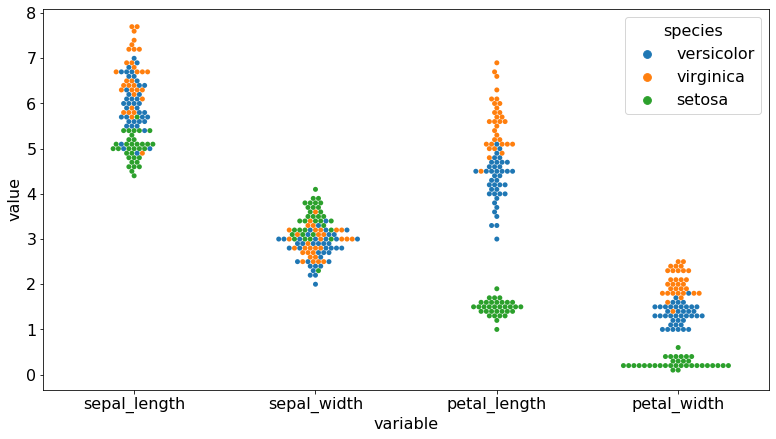

In [5]:
plt.figure(figsize=(13, 7))
melt = train.melt(id_vars=['species'])

# this viz is useful b/c all of our measurements have a similar scale
sns.swarmplot(data=melt, x='variable', y='value', hue='species')

Takeaway: petal_length and petal_width show the most seperation between species.

In [6]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


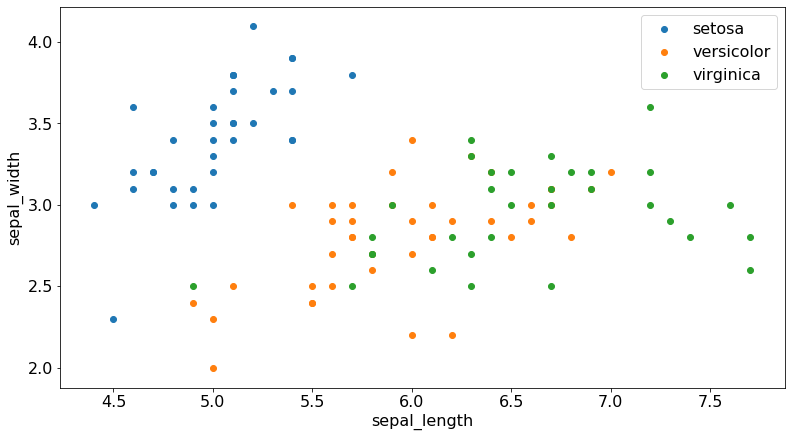

In [7]:
def scatter_by_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

scatter_by_species('sepal_length', 'sepal_width')

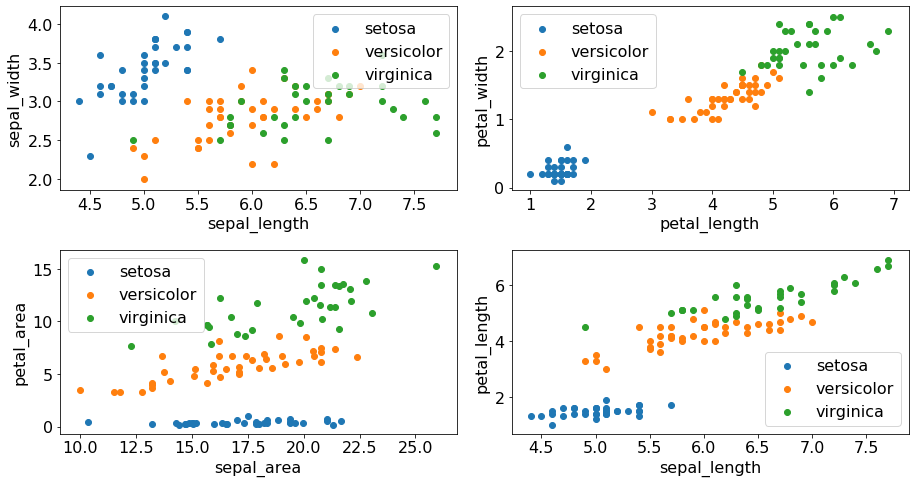

In [8]:
plt.subplot(2, 2, 1)
scatter_by_species('sepal_length', 'sepal_width')
plt.subplot(2, 2, 2)
scatter_by_species('petal_length', 'petal_width')
plt.subplot(2, 2, 3)
scatter_by_species('sepal_area', 'petal_area')
plt.subplot(2, 2, 4)
scatter_by_species('sepal_length', 'petal_length')

plt.tight_layout()

Takeaways:

- sepal_length and sepal_width might be more useful than previously thought
- sepal_area by petal_area shows distinct species groups

In [9]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.161847,0.873929,0.806201,0.671304,0.845726
sepal_width,-0.161847,1.000000,-0.447030,-0.378925,0.618179,-0.309571
petal_length,0.873929,-0.447030,1.000000,0.958996,0.367343,0.955255
petal_width,0.806201,-0.378925,0.958996,1.000000,0.371816,0.978768
sepal_area,0.671304,0.618179,0.367343,0.371816,1.000000,0.450831
petal_area,0.845726,-0.309571,0.955255,0.978768,0.450831,1.000000


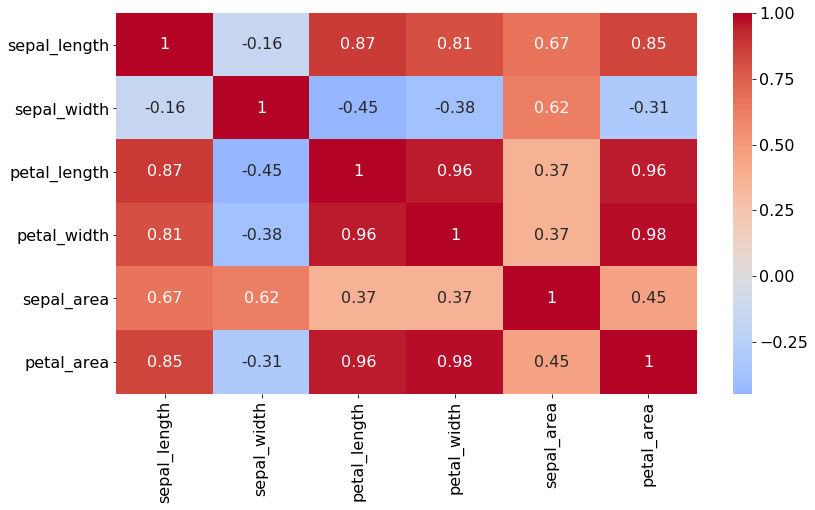

In [10]:
sns.heatmap(train.corr(), cmap='coolwarm', center=0, annot=True)

Takeaways:

- most measures correlate with each other
- sepal_area doesn't correlate that strongly with other measures
- sepal_width doesn't correlate that strongly with other measures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa52cbee7b8>,
      dtype=object)

<Figure size 1728x1152 with 0 Axes>

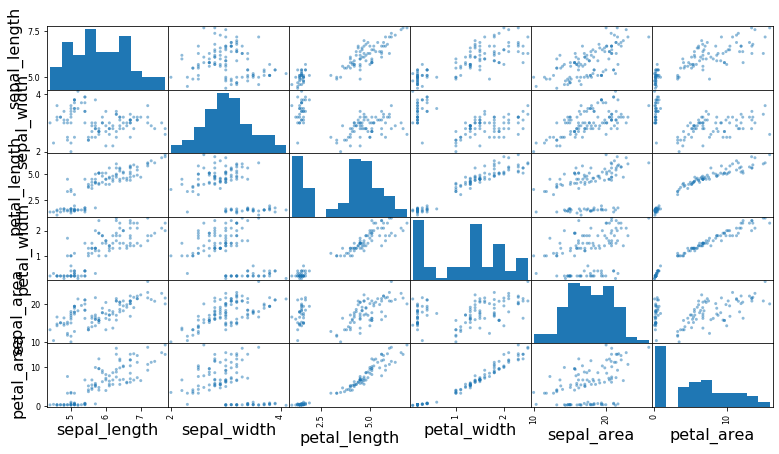

In [11]:
plt.figure(figsize=(24, 16))
pd.plotting.scatter_matrix(train)

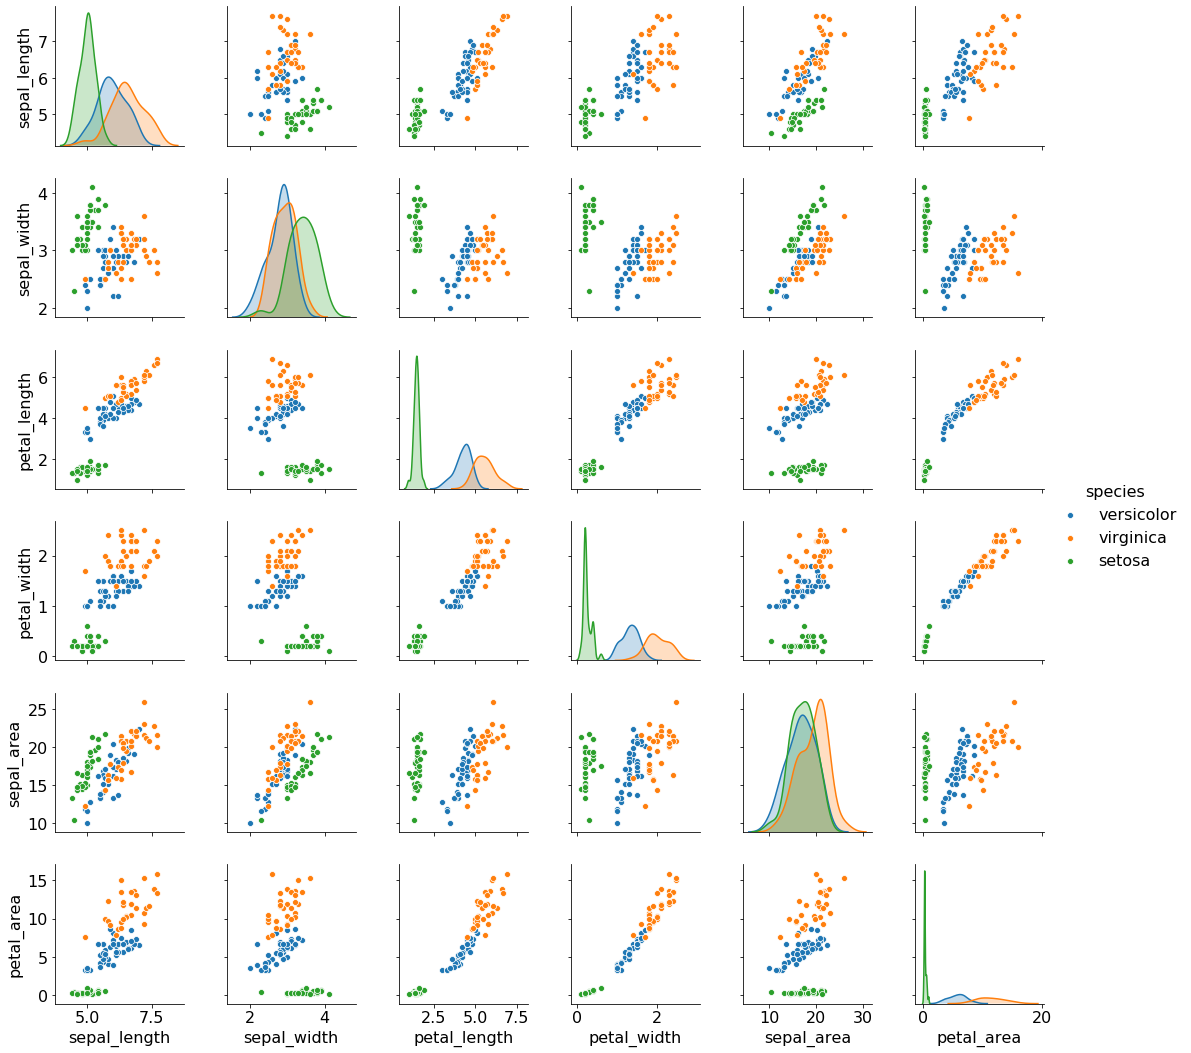

In [13]:
sns.pairplot(train, hue='species')

Takeaway: petal length + petal width show the most seperation between species.

Is the sepal length significantly different in virginica compared to versicolor?

- alpha = .05
- $H_0$: sepal length is the same in virginica and versicolor
- $H_a$: sepal length significantly different in virginica and versicolor

In [15]:
import scipy.stats as stats

# 2 vars: species (categorical) + sepal_length (continous) -- a t-test is approiate
# comparing the means of 2 seperate groups -- 2-sample t-test

virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

In [18]:
train.sepal_length.describe()

count    107.000000
mean       5.845794
std        0.804384
min        4.400000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.700000
Name: sepal_length, dtype: float64

In [16]:
virginica.sepal_length.var(), versicolor.sepal_length.var()

(0.4156350806451613, 0.290121951219512)

In [19]:
t, p = stats.ttest_ind(
    virginica.sepal_length,
    versicolor.sepal_length,
)
print('t=', t, 'p=', p)

t= 4.33932448841308 p= 4.647158050158367e-05


Conclusion: we reject $H_0$ that the sepal length is the same for both groups.